```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture8-NumericalIntegration.pdf)
```

In [1]:
# Preliminaries: import numpy, matplotlib and set default styles
import numpy as np
import matplotlib.pyplot as plt

# Rectangle rule for numerical integration 
# of function f(x) over (a,b) using n subintervals
def rectangle_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a + h / 2.
    for k in range(n):
        ret += f(xk) * h
        xk += h
    return ret



# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

# Trapezoidal rule for numerical integration 
# of function f(x) over (a,b) using n subintervals
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a
    fk = f(xk)
    for k in range(n):
        xk += h
        fk1 = f(xk)
        ret += h * (fk + fk1) / 2.
        fk = fk1
    return ret

# Simpson's rule for numerical integration 
# of function f(x) over (a,b) using n subintervals
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")

    h = (b - a) / n
    ret = f(a) + f(b)
    for k in range(1, n, 2):
        xk = a + k * h 
        ret += 4 * f(xk)
    for k in range(2, n-1, 2):
        xk = a + k * h
        ret += 2 * f(xk)
    ret *= h / 3.0
    return ret

In [2]:
# Rectangle rule for numerical integration with adaptive step
def rectangle_rule_adaptive(f, a, b, nst = 1, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = rectangle_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = rectangle_rule(f, a, b, n)
        ek = (Inew - Iprev) / 3.
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew
        
    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

# Trapezoidal rule for numerical integration with adaptive step
def trapezoidal_rule_adaptive(f, a, b, nst = 1, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = trapezoidal_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = trapezoidal_rule(f, a, b, n)
        ek = (Inew - Iprev) / 3.
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew
        
    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

# Simpson's rule for numerical integration with adaptive step
def simpson_rule_adaptive(f, a, b, nst = 2, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = simpson_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = simpson_rule(f, a, b, n)
        ek = (Inew - Iprev) / 15.
        
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew
        
    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

def romberg(
    f, 
    a, 
    b, 
    accuracy=1e-8, 
    max_order=10
):
    R = np.zeros((max_order, max_order))
    h = (b - a) / 2.
    R[0, 0] = h * (f(a) + f(b)) # The initial trapezoidal rule   
    for n in range(1, max_order):
        trapezoid = 0.0
        for j in range(2**(n-1)):
            trapezoid += f(a + (2*j+1)*h)
        R[n, 0] = 0.5 * R[n-1, 0] + h * trapezoid # The trapezoidal rule
        l = 1
        # The Romberg iterations
        for m in range(1, n+1):
            l *= 4
            R[n, m] = (l * R[n, m-1] - R[n-1, m-1]) / (l-1)
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(n, R[n, m], abs(R[n, m] - R[n-1, m-1])))
        if abs(R[n, m] - R[n-1, m-1]) < accuracy:
            return R[n, m]
        h /= 2.
    print("Romberg method did not converge to required accuracy")
    return R[-1, -1]


# Improper integrals

## Discontinuous integrands

The integrand can be discontinuous. Consider a piecewise function defined as

$$
f(x) = 3 x^2 + x + 3 \qquad {\rm for} ~ x < 1,
$$

and

$$
f(x) = 2 x^3 - 3x^2 + x + 3. \qquad {\rm for} ~ x > 1.
$$

There is a discontinuity at $x = 1$ but there is nothing wrong with computing the integral over say an interval $[0,2]$ containing the discontinuity:
$$
I = \int_0^2 f(x) = 9.5
$$

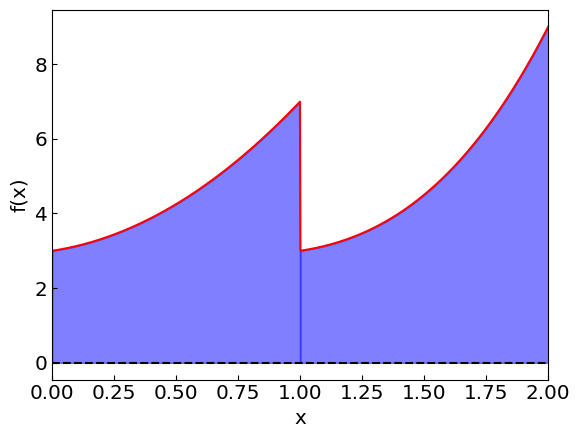

In [3]:
def fdist1(x):
    return 3*x**2 + x + 3

def fdist2(x):
    return 2*x**3 - 3*x**2 + x + 3

# Discontinuity point
xdistcont = 1.

def fdist(x):
    x = np.asarray(x)  # Ensure x is a numpy array
    result = np.where(x < xdistcont, fdist1(x), fdist2(x))
    return result

xplot = np.linspace(0,2,1000)
yplot = fdist(xplot)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,2)
plt.axhline(y = 0., color = 'black', linestyle = '--')

# Fill the area under the curve
plt.fill_between(xplot, yplot, where=(xplot < xdistcont), color='blue', alpha=0.5)
plt.fill_between(xplot, yplot, where=(xplot >= xdistcont), color='blue', alpha=0.5)

plt.plot(xplot,yplot, color = 'red')
plt.show()

However, applying a composite rule to a function with a discontinuity can be problematic:

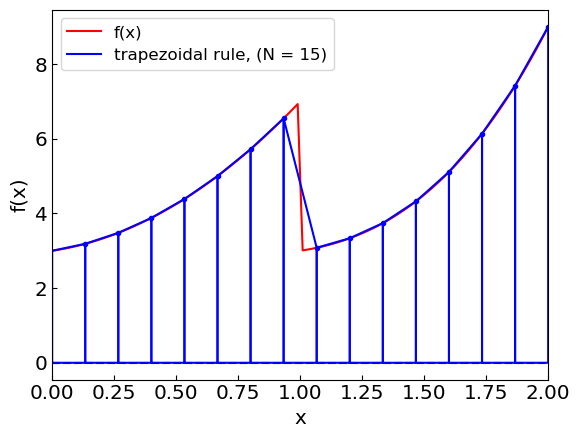

Trapezoidal rule:
Iteration:     1, I =   12.000000000000000
Iteration:     2, I =    9.000000000000000, error estimate = -1.000000000000000
Iteration:     3, I =    8.875000000000000, error estimate = -0.041666666666667
Iteration:     4, I =    9.093750000000000, error estimate = 0.072916666666667
Iteration:     5, I =    9.273437500000000, error estimate = 0.059895833333333
Iteration:     6, I =    9.380859375000000, error estimate = 0.035807291666667
Iteration:     7, I =    9.438964843750000, error estimate = 0.019368489583333
Iteration:     8, I =    9.469116210937500, error estimate = 0.010050455729167
Iteration:     9, I =    9.484466552734375, error estimate = 0.005116780598958
Iteration:    10, I =    9.492210388183594, error estimate = 0.002581278483073
Iteration:    11, I =    9.496099472045898, error estimate = 0.001296361287435
Iteration:    12, I =    9.498048305511475, error estimate = 0.000649611155192
Iteration:    13, I =    9.499023795127869, error estimate = 0.00032

In [23]:
# Visualize
def rectangle_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    labelrec = "rectangle rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / n
    xk = a + h / 2.
    for k in range(1,n+1):
        fval = f(xk)
        if (k == 1):
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.], 
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.], 
                     color = 'blue')
        
        xks.append(xk)
        fks.append(fval)
        
        xk += h
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

# Visualize
def trapezoidal_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    labelrec = "trapezoidal rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / n
    xk = a
    fk = f(xk)
    for k in range(1,n+1):
        xk += h
        fk1 = f(xk)
        if (k == 1):
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.], 
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.], 
                     color = 'blue')
                    
        xks.append(xk)
        fks.append(fk1)
        
        fk = fk1
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

trapezoidal_rule_plot(fdist,0,2,15).show()
# Adaptive trapezoidal rule
print("Trapezoidal rule:")
res = trapezoidal_rule_adaptive(fdist,0,2,1,1.e-8)

In [5]:
# Adaptive Simpson rule
print("Adaptive Simpson's rule:")
res = simpson_rule_adaptive(fdist,0,2,2,1.e-8)

Adaptive Simpson's rule:
Iteration:     1, I =    8.000000000000000
Iteration:     2, I =    8.833333333333332, error estimate = 0.055555555555555
Iteration:     3, I =    9.166666666666666, error estimate = 0.022222222222222
Iteration:     4, I =    9.333333333333332, error estimate = 0.011111111111111
Iteration:     5, I =    9.416666666666666, error estimate = 0.005555555555556
Iteration:     6, I =    9.458333333333332, error estimate = 0.002777777777778
Iteration:     7, I =    9.479166666666666, error estimate = 0.001388888888889
Iteration:     8, I =    9.489583333333332, error estimate = 0.000694444444444
Iteration:     9, I =    9.494791666666666, error estimate = 0.000347222222222
Iteration:    10, I =    9.497395833333332, error estimate = 0.000173611111111
Iteration:    11, I =    9.498697916666666, error estimate = 0.000086805555556
Iteration:    12, I =    9.499348958333332, error estimate = 0.000043402777778
Iteration:    13, I =    9.499674479166666, error estimate = 0.

In [6]:
# Romberg method
print("Romberg method:")
res = romberg(fdist,0,2,1e-8,18)

Romberg method:
Iteration:     1, I =    8.000000000000000, error estimate = 4.000000000000000
Iteration:     2, I =    8.888888888888889, error estimate = 0.888888888888889
Iteration:     3, I =    9.193650793650793, error estimate = 0.304761904761904
Iteration:     4, I =    9.347514610782586, error estimate = 0.153863817131793
Iteration:     5, I =    9.423831487774139, error estimate = 0.076316876991553
Iteration:     6, I =    9.461925044409840, error estimate = 0.038093556635701
Iteration:     7, I =    9.480963684231190, error estimate = 0.019038639821350
Iteration:     8, I =    9.490481987353379, error estimate = 0.009518303122189
Iteration:     9, I =    9.495241011830926, error estimate = 0.004759024477547
Iteration:    10, I =    9.497620508184726, error estimate = 0.002379496353800
Iteration:    11, I =    9.498810254376020, error estimate = 0.001189746191294
Iteration:    12, I =    9.499405127223469, error estimate = 0.000594872847449
Iteration:    13, I =    9.499702563

### Splitting the integration

The methods still work but the accuracy is significantly reduced.

A better solution is to split the integration into two separate integrals

$$
I = I_1 + I_2,
$$

where

$$
I_1 = \int_a^{x_{\rm distcont}} f_1(x)
$$

and

$$
I_2 = \int_{x_{\rm distcont}}^b f_2(x)
$$

and compute the integrals separately.
Since we want the error to be the same as for the original integration, we need to double the accuracy goal for each of the integrals.

In [7]:
# Adaptive rectangle rule
print("Rectangle rule:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = rectangle_rule_adaptive(fdist1,a,b,1,0.5*eps)

a = xdistcont
b = 2
I2 = rectangle_rule_adaptive(fdist2,a,b,1,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

Rectangle rule:
Iteration:     1, I =    4.250000000000000
Iteration:     2, I =    4.437500000000000, error estimate = 0.062500000000000
Iteration:     3, I =    4.484375000000000, error estimate = 0.015625000000000
Iteration:     4, I =    4.496093750000000, error estimate = 0.003906250000000
Iteration:     5, I =    4.499023437500000, error estimate = 0.000976562500000
Iteration:     6, I =    4.499755859375000, error estimate = 0.000244140625000
Iteration:     7, I =    4.499938964843750, error estimate = 0.000061035156250
Iteration:     8, I =    4.499984741210938, error estimate = 0.000015258789062
Iteration:     9, I =    4.499996185302734, error estimate = 0.000003814697266
Iteration:    10, I =    4.499999046325684, error estimate = 0.000000953674316
Iteration:    11, I =    4.499999761581421, error estimate = 0.000000238418579
Iteration:    12, I =    4.499999940395355, error estimate = 0.000000059604645
Iteration:    13, I =    4.499999985098839, error estimate = 0.000000014

In [8]:
# Adaptive trapezoidal rule
print("Trapezoidal rule:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = trapezoidal_rule_adaptive(fdist1,a,b,1,0.5*eps)

a = xdistcont
b = 2
I2 = trapezoidal_rule_adaptive(fdist2,a,b,1,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

Trapezoidal rule:
Iteration:     1, I =    5.000000000000000
Iteration:     2, I =    4.625000000000000, error estimate = -0.125000000000000
Iteration:     3, I =    4.531250000000000, error estimate = -0.031250000000000
Iteration:     4, I =    4.507812500000000, error estimate = -0.007812500000000
Iteration:     5, I =    4.501953125000000, error estimate = -0.001953125000000
Iteration:     6, I =    4.500488281250000, error estimate = -0.000488281250000
Iteration:     7, I =    4.500122070312500, error estimate = -0.000122070312500
Iteration:     8, I =    4.500030517578125, error estimate = -0.000030517578125
Iteration:     9, I =    4.500007629394531, error estimate = -0.000007629394531
Iteration:    10, I =    4.500001907348633, error estimate = -0.000001907348633
Iteration:    11, I =    4.500000476837158, error estimate = -0.000000476837158
Iteration:    12, I =    4.500000119209290, error estimate = -0.000000119209290
Iteration:    13, I =    4.500000029802322, error estimate 

In [9]:
# Adaptive Simpson's rule
print("Simpson's rule:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = simpson_rule_adaptive(fdist1,a,b,2,0.5*eps)

a = xdistcont
b = 2
I2 = simpson_rule_adaptive(fdist2,a,b,2,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

Simpson's rule:
Iteration:     1, I =    4.500000000000000
Iteration:     2, I =    4.500000000000000, error estimate = 0.000000000000000
Iteration:     1, I =    5.000000000000000
Iteration:     2, I =    5.000000000000000, error estimate = 0.000000000000000
I1 = 4.5
I2 = 5.0
I = 9.5


In [10]:
# Romberg method
print("Romberg method:")
eps = 1.e-8
a = 0
b = xdistcont
I1 = romberg(fdist1,a,b,0.5*eps)

a = xdistcont
b = 2
I2 = romberg(fdist2,a,b,0.5*eps)

print("I1 =",I1)
print("I2 =",I2)
print("I =",I1 + I2)

Romberg method:
Iteration:     1, I =    4.500000000000000, error estimate = 0.500000000000000
Iteration:     2, I =    4.500000000000000, error estimate = 0.000000000000000
Iteration:     1, I =    5.000000000000000, error estimate = 1.000000000000000
Iteration:     2, I =    5.000000000000000, error estimate = 0.000000000000000
I1 = 4.5
I2 = 5.0
I = 9.5


<!-- ## Improper integrals

Some integrals may contain peculiarities like:
- Integrable singularity (typically at endpoints)
- (Semi-)infinite integration range -->

## Integrable singularities
Consider the following integral:

$$
\int_0^1 \frac{1}{\sqrt{x}} dx = \left. 2\sqrt{x} \right|_0^1 = 2
$$

The integrand diverges at $x = 0$, however, this singularity is integrable.

The standard trapezoidal (and any method that makes use of function evaluation at integration endpoints) will fail, however, due to division by zero.

In [11]:
def fsing1(x):
    return 1./np.sqrt(x)

trapezoidal_rule(fsing1,0.,1.,10)

/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_77600/847063500.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1./np.sqrt(x)


np.float64(inf)

The solution here is to use a method that does not evaluate the function at the endpoints.
For instance, the rectangle rule seems to work, albeit its performance is reduced.

In [12]:
print('Using rectangle rule to evaluate \int_0^1 1/\sqrt{x} dx')
nst = 1
res = rectangle_rule_adaptive(fsing1,0.,1.,1,1.e-3,20)

Using rectangle rule to evaluate \int_0^1 1/\sqrt{x} dx
Iteration:     1, I =    1.414213562373095
Iteration:     2, I =    1.577350269189626, error estimate = 0.054378902272177
Iteration:     3, I =    1.698844079579673, error estimate = 0.040497936796682
Iteration:     4, I =    1.786461001734842, error estimate = 0.029205640718390
Iteration:     5, I =    1.848856684639738, error estimate = 0.020798560968299
Iteration:     6, I =    1.893088359706383, error estimate = 0.014743891688882
Iteration:     7, I =    1.924392755699513, error estimate = 0.010434798664376
Iteration:     8, I =    1.946535279970520, error estimate = 0.007380841423669
Iteration:     9, I =    1.962194152677056, error estimate = 0.005219624235512
Iteration:    10, I =    1.973267083679453, error estimate = 0.003690977000799
Iteration:    11, I =    1.981096937261288, error estimate = 0.002609951193945
Iteration:    12, I =    1.986633507070365, error estimate = 0.001845523269692
Iteration:    13, I =    1.99054

## Semi-infinite interval

Consider a semi-infinite range integration problem

$$
\int_a^\infty f(x) dx.
$$

As long as $f(x)$ decays sufficiently fast, the integral exists.
However, the semi-infinite integration range poses a challenge for applying numerical integration methods, as they are designed to work with finite integration ranges.

One possible solution is to use a **variable transformation** that maps the semi-infinite range into a finite range.
For instance, if we use the transformation

$$
x = a + \frac{t}{1-t},
$$

then
$dx = \frac{dt}{(1-t)^2}$ 
and the integral transforms into

$$
\int_a^\infty f(x) dx = \int_0^1 f\left(a + \frac{t}{1-t}\right) \frac{dt}{(1-t)^2} = \int_0^1 g(t) dt,
$$

i.e. the integration of a function 

$$
g(t) = f\left(a + \frac{t}{1-t}\right) \frac{1}{(1-t)^2}
$$

over a finite range $(0,1)$.
One can see that $g(t)$ has a singularity at $t=1$, but the singularity is integrable as long as the original integral is integrable.

### Example

Let us test the method on the example

$$
\int_0^\infty e^{-x} dx = 1
$$

In [13]:
def fexp(x):
    return np.exp(-x)

def g(t, f, a = 0.):
    return f(a + t / (1. - t)) / (1. - t)**2

In [14]:
a = 0.
def frect(x):
    return g(x, fexp, a)

print('Using change of variable and the rectangle rule to evaluate \int_0^\infty \exp(-x) dx')
res = rectangle_rule_adaptive(frect,0.,1.,1,1.e-6,20)

Using change of variable and the rectangle rule to evaluate \int_0^\infty \exp(-x) dx
Iteration:     1, I =    1.471517764685769
Iteration:     2, I =    1.035213267452946, error estimate = -0.145434832410941
Iteration:     3, I =    0.984670579385046, error estimate = -0.016847562689300
Iteration:     4, I =    1.001784913275257, error estimate = 0.005704777963404
Iteration:     5, I =    1.000155714391028, error estimate = -0.000543066294743
Iteration:     6, I =    1.000040642390661, error estimate = -0.000038357333456
Iteration:     7, I =    1.000010172618432, error estimate = -0.000010156590743
Iteration:     8, I =    1.000002543136036, error estimate = -0.000002543160799
Iteration:     9, I =    1.000000635783161, error estimate = -0.000000635784292


In [15]:
# Try a > 0
a = 3.
def frect(x):
    return g(x, fexp, a)

print('Using change of variable and the rectangle rule to evaluate \int_',a,'^\infty \exp(-x) dx')
# nst = 1
# for n in range(1,6):
#     nst *= 10
#     print("N =",nst,", I = ",rectangle_rule(frect,0.,1.,nst))
rectangle_rule_adaptive(frect,0.,1.,1,1.e-6,20)

print('Expected value: exp(-a) =', np.exp(-a))

Using change of variable and the rectangle rule to evaluate \int_ 3.0 ^\infty \exp(-x) dx
Iteration:     1, I =    0.073262555554937
Iteration:     2, I =    0.051540233722000, error estimate = -0.007240773944312
Iteration:     3, I =    0.049023861455667, error estimate = -0.000838790755444
Iteration:     4, I =    0.049875933967130, error estimate = 0.000284024170487
Iteration:     5, I =    0.049794820930896, error estimate = -0.000027037678745
Iteration:     6, I =    0.049789091833346, error estimate = -0.000001909699183
Iteration:     7, I =    0.049787574832713, error estimate = -0.000000505666878
Expected value: exp(-a) = 0.049787068367863944


## Infinite interval

For an integral over an infinite interval

$$
\int_{-\infty}^\infty f(x) dx
$$

one can also apply a change of variables to transform it into a finite interval.
One option is

$$
x = \frac{t}{1-t^2},
$$

which gives
$dx = \frac{1+t^2}{(1-t^2)^2} dt$ 
and

$$
\int_{-\infty}^\infty f(x) dx = 
\int_{-1}^1 f\left(\frac{t}{1-t^2}\right) \frac{1+t^2}{(1-t^2)^2} dt = \int_{-1}^1 g(t) dt,
$$

transforming the original integrand $f(x)$ into 

$$
g(t) = f\left(\frac{t}{1-t^2}\right) \frac{1+t^2}{(1-t^2)^2}
$$

which is integrated over the interval $[-1,1]$.
The new integrand $g(t)$ has singularities at $t=\pm 1$, but they are integrable as long as $f(x)$ is integrable over the infinite interval $(-\infty,\infty)$.

Let us try it with
$$
\int_{-\infty}^\infty e^{-x^2} dx = \sqrt{\pi} = 1.772454\ldots
$$

In [16]:
def fexp2(x):
    return np.exp(-x**2)

def g2(t, f):
    return f(t / (1. - t**2)) * (1.+t**2) / (1. - t**2)**2


In [17]:
def frect2(x):
    return g2(x, fexp2)

print('Using change of variable and the rectangle rule to evaluate \int_{-\infty}^\infty \exp(-x^2) dx')
rectangle_rule_adaptive(frect2,-1.,1.,1,1.e-6,20)

print('Expected value: \sqrt{\pi} =', np.sqrt(np.pi))

Using change of variable and the rectangle rule to evaluate \int_{-\infty}^\infty \exp(-x^2) dx
Iteration:     1, I =    2.000000000000000
Iteration:     2, I =    2.849690615244243, error estimate = 0.283230205081414
Iteration:     3, I =    1.557994553948652, error estimate = -0.430565353765197
Iteration:     4, I =    1.808005109208286, error estimate = 0.083336851753211
Iteration:     5, I =    1.770118560572371, error estimate = -0.012628849545305
Iteration:     6, I =    1.772492101507391, error estimate = 0.000791180311673
Iteration:     7, I =    1.772453880915058, error estimate = -0.000012740197444
Iteration:     8, I =    1.772453850905505, error estimate = -0.000000010003185
Expected value: \sqrt{\pi} = 1.7724538509055159


## Example: Relativistic quantum distribution

In a relativistic ideal gas, the density of particles can be calculated as an integral over the momentum states

$$
n = \frac{d}{2\pi^2} \int_0^\infty dk \, k^2 \, \left[\exp\left\{\frac{\sqrt{m^2+k^2}-\mu}{T} \right\} + \eta \right ]^{-1}.
$$

Here $d$ is the spin degeneracy, $m$ is the mass of the particle, and $T$ and $\mu$ are the temperature and chemical potential. $\eta$ is the statistics, such that $\eta = +1$ corresponds to Fermi-Dirac distribution, $\eta = -1$ to Bose-Einstein distribution, and $\eta = 0$ to Maxwell-Boltzmann approximation.

In general, the integral has to be evaluated numerically. First, it is useful to make the integration variable dimensionless through a change of variable $\tilde k = k / T$. Then

$$
n = \frac{d T^3}{2\pi^2} \int_0^\infty d \tilde k \, \tilde k^2 \, \left[\exp\left\{\sqrt{\tilde m^2+\tilde k^2}-\tilde \mu \right\} + \eta \right ]^{-1},
$$

where $\tilde m = m/T$ and $\tilde \mu = \mu / T$.
This expression can be cast in a form

$$
\tilde n = n/T^3 = \int_0^\infty d x f(x)
$$

with

$$
f(x) = \frac{d}{2\pi^2} x^2 \, \left[\exp\left\{\sqrt{\tilde m^2+x^2}-\tilde \mu \right\} + \eta \right ]^{-1}~.
$$

**Steps**

1. Make a change of variables $x \to t/(1-t)$ to convert the semi-infinite integration range $x \in (0,\infty)$ into a finite range $t \in (0,1)$.

In [18]:
def fThermal(x):
    return d * x**2 / (2 * np.pi**2) / (np.exp(np.sqrt((m/T)**2 + x**2) - mu/T) + eta)

def g(t, f, a = 0.):
    return f(a + t / (1. - t)) / (1. - t)**2

2. Calculate the scaled density $\tilde n = n/T^3$ using numerical integration for the following values of parameters, corresponding to an ideal gas of $\pi$-mesons:

$$
m = 138~\textrm{MeV}, \qquad d = 1, \qquad T = 150~\textrm{MeV}, \qquad \mu = 0.
$$

Ignore quantum statisics for the time being by setting $\eta = 0$.

We will use the rectangle rule to avoid singularities at endpoints.

In [19]:
T = 150 # MeV
mu = 0  
m = 138 # MeV
d = 1
eta = 0

def nIntegral(eps = 1e-6):
    def fInt(t):
        return g(t, fThermal, 0)
    return rectangle_rule_adaptive(fInt, 0., 1., 1, eps, 20)

def nT3num(inT, inMu, eps):
    global T, mu
    T = inT
    mu = inMu
    return nIntegral(eps)

print("Using adaptive rectangle rule:", "n/T^3 =",nT3num(T,mu,1e-6))

Iteration:     1, I =    0.052071598602252
Iteration:     2, I =    0.160089665256309, error estimate = 0.036006022218019
Iteration:     3, I =    0.075406103813409, error estimate = -0.028227853814300
Iteration:     4, I =    0.085410602578111, error estimate = 0.003334832921567
Iteration:     5, I =    0.084623507486682, error estimate = -0.000262365030476
Iteration:     6, I =    0.084721979027677, error estimate = 0.000032823846998
Iteration:     7, I =    0.084722493628870, error estimate = 0.000000171533731
Using adaptive rectangle rule: n/T^3 = 0.08472249362886973


3. Compare the results to the analytic expression

$$
\tilde n = n/T^3 = \frac{d m^2}{2\pi^2 T^2} K_2(m/T) e^{\mu/T}.
$$

Here $K_2$ is the modified Bessel function of the second kind, which is accessbile through scipy package

In [20]:
from scipy.special import kn

# Analytic expression for the density in the Maxwell-Boltzmann limit
def nT3analyt(T, mu, m, d = 1):
    return d * m**2 / (2 * np.pi**2 * T**2) * kn(2,m/T) * np.exp(mu/T)

print("Analytic result:", "n/T^3 =", nT3analyt(T,mu,m))

Analytic result: n/T^3 = 0.08472249379368636


4. Incorporate the effect of Bose statistics by setting $\eta = -1$ and compare the results to the $\eta = 0$ case

In [21]:
prec = 1.e-6
eta = 0
print("Maxwell-Boltzmann:", "n/T^3 =",nT3num(T,mu,prec))

eta = -1
print("    Bose-Einstein:", "n/T^3 =",nT3num(T,mu,prec))

Iteration:     1, I =    0.052071598602252
Iteration:     2, I =    0.160089665256309, error estimate = 0.036006022218019
Iteration:     3, I =    0.075406103813409, error estimate = -0.028227853814300
Iteration:     4, I =    0.085410602578111, error estimate = 0.003334832921567
Iteration:     5, I =    0.084623507486682, error estimate = -0.000262365030476
Iteration:     6, I =    0.084721979027677, error estimate = 0.000032823846998
Iteration:     7, I =    0.084722493628870, error estimate = 0.000000171533731
Maxwell-Boltzmann: n/T^3 = 0.08472249362886973
Iteration:     1, I =    0.070079419142193
Iteration:     2, I =    0.168395499279461, error estimate = 0.032772026712423
Iteration:     3, I =    0.083996336251779, error estimate = -0.028133054342561
Iteration:     4, I =    0.093987772319729, error estimate = 0.003330478689317
Iteration:     5, I =    0.093223117309176, error estimate = -0.000254885003518
Iteration:     6, I =    0.093321713544158, error estimate = 0.0000328654